<a href="https://colab.research.google.com/github/Droid008/Introduction-to-the-processing-of-a-natural-language/blob/Lesson-%2314/HW_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import files

upload = files.upload()

Saving dataset.jsonl to dataset.jsonl


In [3]:
!ls -la

total 39600
drwxr-xr-x 1 root root     4096 Jul 18 15:11 .
drwxr-xr-x 1 root root     4096 Jul 18 14:57 ..
drwxr-xr-x 4 root root     4096 Jul 13 13:42 .config
-rw-r--r-- 1 root root 40531099 Jul 18 15:11 dataset.jsonl
drwxr-xr-x 1 root root     4096 Jul 13 13:43 sample_data


In [4]:
!mkdir data

In [5]:
!mv 'dataset.jsonl' 'data/dataset.jsonl'

In [6]:
DATASET_PATH = 'data/dataset.jsonl'

with open(DATASET_PATH) as f: # open the dataset file
    df = pd.read_json(DATASET_PATH, lines=True).set_index('id') # read the .jsonl file into Pandas DataFrame

In [7]:
print(df.dtypes)
# display(df)

date      datetime64[ns, UTC]
rating                float64
text                   object
dtype: object


In [8]:
df.head()

,date,rating,text
id,,,
1,2004-08-30 11:24:00+00:00,22010.0,"<Ares> ppdv, все юниксы очень дружелюбны.. они..."
2,2004-08-30 11:25:00+00:00,25105.0,<томатик_рад> а ты не чувствуешь красоту мира?...
3,2004-08-30 11:27:00+00:00,7192.0,"<Дор> ""мышка, почему у тебя такие большие глаз..."
4,2004-08-30 11:28:00+00:00,29169.0,"<PPDV[os2]> ""Мальчики, вы что больные, бегать ..."
5,2004-08-30 11:26:00+00:00,7140.0,<Ohtori_Akio> мы - как разработчики - живём с ...


# Visualizing the data

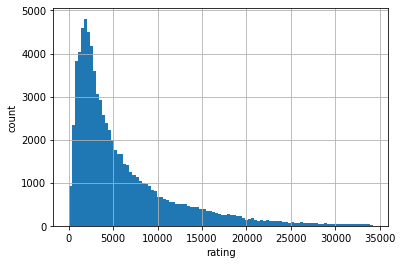

In [9]:
# plot rating histogram with outliers removed
rating = df.rating.dropna()
quantile = rating.quantile(.99)
rating.hist(bins=100, range=(rating.min(), quantile))
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

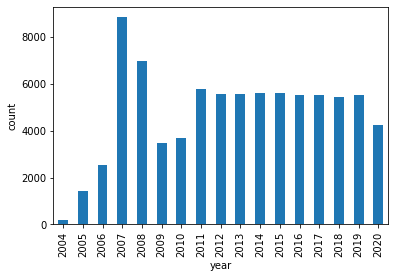

In [10]:
# plot quote count by year
by_year = df.groupby(df.date.dt.year)['text'].count()
by_year.plot.bar()
plt.xlabel('year')
plt.ylabel('count')
plt.show()

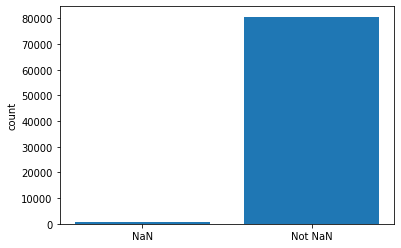

In [11]:
# plot count of NaN and not-NaN rated quotes
nans = df.rating.isna().sum()
not_nans = len(df) - nans


bars = [nans, not_nans]
y_pos = np.arange(len(bars))
plt.bar(y_pos, bars)
plt.xticks(y_pos, ('NaN', 'Not NaN'))
plt.ylabel('count')
plt.show()

In [12]:
pd.set_option('display.max_colwidth', 150)
# pd.set_option('display.width', 500)

In [13]:
# df['text'][0:5]
df['text'][2]

'<томатик_рад> а ты не чувствуешь красоту мира?\n<fox> честно говоря, я сейчас чувствую только отсутствие http.\n<томатик_рад> не туда смотришь, глянь вокруг!\n<fox> как я гляну, если http не работает? :/'

In [14]:
!wget https://gist.githubusercontent.com/avidale/d3da0ded85a4a16db6eb84d8331638ce/raw/a188084e5ef37b43b01fef0534b55c865b9a569e/tweets.txt

--2022-07-18 15:12:00--  https://gist.githubusercontent.com/avidale/d3da0ded85a4a16db6eb84d8331638ce/raw/a188084e5ef37b43b01fef0534b55c865b9a569e/tweets.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4659 (4.5K) [text/plain]
Saving to: ‘tweets.txt’

tweets.txt          100%[===================>]   4.55K  --.-KB/s    in 0s      

2022-07-18 15:12:00 (69.2 MB/s) - ‘tweets.txt’ saved [4659/4659]



In [15]:
!ls

data  sample_data  tweets.txt


In [16]:
with open('tweets.txt', 'r') as f:
    tweets = f.read().strip().split('\n\n')
print(len(tweets))
for i in range(3):
    print(tweets[i])

26
Соловьев наконец-то вышел на новый уровень - теперь его стали банить и в офлайне
Дарим мы тебе бутылку игристого вина. Пить тебе еще рано, но встретиться с ней за некоторые преступления ты уже можешь. ПОЗ-ДРАВ-ЛЯ-ЕМ!
Да. Еще очень многие помнят, что такое госплан, как планировалось, талоны на еду, очереди, дефицит, выездные визы. Но спасибо, что напомнил


In [17]:
import torch
device = torch.device("cuda")

In [19]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 39.1 MB/s 
     |████████████████████████████████| 101 kB 13.0 MB/s 
     |████████████████████████████████| 596 kB 61.1 MB/s 
     |████████████████████████████████| 6.6 MB 68.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [20]:
from transformers import AutoTokenizer, AutoModelForCausalLM

In [21]:
model_name = 'sberbank-ai/rugpt3large_based_on_gpt2'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

Downloading:   0%|          | 0.00/609 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Downloading:   0%|          | 0.00/2.93G [00:00<?, ?B/s]

In [22]:
import random

In [23]:
sep = '\n***\n'  # Признак того, что твит закончился и нужногенерировать ещё один твит


# Так как мы постоянно сэмплируем разные твиты,
# мы будем постоянно получать разное распределение
prefix = sep.join([''] + random.sample(tweets, k=5) + [''])

tokens = tokenizer(prefix, return_tensors='pt')
tokens = {k: v.to(model.device) for k, v in tokens.items()}
end_token_id = tokenizer.encode('***')[0]  # '***' - токен который будет оканчивать твит

# выводим то, что мы передаём на вход
print(prefix)


***
Теперь главное, чтобы все дожили до второго чтения
***
И немножечко зиганул
***
Ну всё. Теперь придется господствовать
***
Но тут главное, чтобы тракторы и бульдозеры были в порядке - и продолжали качественно давить вредные иностранные продукты
***
Ну это примерно как Пескову поручить расследовать информацию о его часах
***



In [24]:
size = tokens['input_ids'].shape[1]
output = model.generate(
    **tokens, 
    #end_token=end_token_id,
    do_sample=False,  # вкл/выкл режим выдачи нескольких вариантов д.б. ещё один параметр
    max_length=size+128, 
    # max_length=size+64,
    repetition_penalty=4.2,  # штраф за повторы одинарных токенов
    temperature=0.7,  # температура
    num_beams=10,  # Строим дерево глубины 10
    # no_repeat_ngram_size=3  # ! тройки подряд идущих токенов не должны повторяться (3 и меньше токенов не должны повторяться)
)
decoded = tokenizer.decode(output[0])
result = decoded[len(prefix):]
print(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


А если серьезно, то я не знаю, что с этим делать
***
В общем, у меня нет никаких иллюзий по поводу того, кто будет следующим президентом России
***
Я считаю, что Путин должен быть пожизненно отстранен от власти на том основании, что он нарушил Конституцию Российской Федерации
***
Такой вариант развития событий мне представляется наиболее вероятным
***
С другой стороны, вполне возможно, что через какое-то время к власти придет какой-нибудь более адекватный человек
***
Надеюсь, что так оно и будет
***
Уверен, что этого никогда не случится
***
Мне кажется,


In [25]:
size = tokens['input_ids'].shape[1]
output = model.generate(
    **tokens, 
    #end_token=end_token_id,
    do_sample=False, 
    max_length=size+128, 
    # max_length=size+64,
    repetition_penalty=4.2,   # штраф за повторы одинарных токенов
    temperature=1.3,  # температура
    num_beams=7,  # Строим дерево глубины 10
    no_repeat_ngram_size=5  # ! тройки подряд идущих токенов не должны повторяться (3 и меньше токенов не должны повторяться)
)
decoded = tokenizer.decode(output[0])
result = decoded[len(prefix):]
print(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


А вообще-то я не знаю, что там у него с часами...<s>
Оригинал взят у в postУважаемые френды! 
В связи с тем, что мой журнал временно заморожен на неопределенный срок, прошу прощения за то, что так долго не отвечал на ваши комментарии. 

Я очень рад, что вы откликнулись на мою просьбу об оказании материальной помощи для восстановления моего журнала. Спасибо всем, кто оказал мне посильную материальную помощь. Я искренне надеюсь, что когда-нибудь смогу снова вернуться к вам со своими постами или стать вашим постоянным читателем. Надеюсь также, что


In [26]:
!pip install razdel networkx pymorphy2[fast] nltk rouge==0.3.1
!pip install --upgrade datasets tqdm transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 4.8 MB/s 
     |████████████████████████████████| 8.2 MB 27.2 MB/s 
     |████████████████████████████████| 371 kB 10.5 MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp37-cp37m-linux_x86_64.whl size=861380 sha256=7070b14c57fd2997a7534bfbe0662db9eceb55f938ed577729505ea95f51c1c0
  Stored in directory: /root/.cache/pip/wheels/85/51/a4/2de41ff197786537075027c27b479a38da92f50abc86634445
Successfully built DAWG
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 17.2 MB/s 
     |████████████████████████████████| 140 kB 65.6 MB/s 
     |████████████████████████████████| 1.1 MB 60.8 MB/s 
     |████████████████████████████████| 212 kB 12.7 MB/s 
     |████████████████████████████████| 127 kB 67.3 MB/s 
     |████████████████████████████████| 94 kB 4.3 M

## Обучим модель на задачу суммаризации

In [27]:
!pip install datasets

In [28]:
!ls

data  sample_data  tweets.txt


In [29]:
from datasets import load_dataset

dataset_train = load_dataset('IlyaGusev/gazeta', revision="v1.0", split= 'train[:10%]')
dataset_test = load_dataset('IlyaGusev/gazeta', revision="v1.0", split= 'test[:10%]')

No config specified, defaulting to: gazeta/default


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/52400 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5770 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5265 [00:00<?, ? examples/s]

Dataset gazeta downloaded and prepared to /root/.cache/huggingface/datasets/IlyaGusev___gazeta/default/1.0.0/ef9349c3c0f3112ca4036520d76c4bc1b8a79d30bc29643c6cae5a094d44e457. Subsequent calls will reuse this data.


No config specified, defaulting to: gazeta/default
Reusing dataset gazeta (/root/.cache/huggingface/datasets/IlyaGusev___gazeta/default/1.0.0/ef9349c3c0f3112ca4036520d76c4bc1b8a79d30bc29643c6cae5a094d44e457)


In [30]:
dataset_train

Dataset({
    features: ['text', 'summary', 'title', 'date', 'url'],
    num_rows: 5240
})

In [31]:
dataset_test

Dataset({
    features: ['text', 'summary', 'title', 'date', 'url'],
    num_rows: 577
})

In [32]:
dataset_test['summary'][0]

'В NASA назвали четыре миссии в дальний космос, которые в этом десятилетии могут быть запущены американцами. Среди них — две миссии по изучению Венеры, полет к спутнику Юпитера и экспедиция к Тритону, спутнику Нептуна.'

In [33]:
dataset_test['title'][0]

'Венера, Ио или Тритон: куда полетит NASA'

In [34]:
model_name = "IlyaGusev/rut5_base_sum_gazeta"

In [35]:
def len_tok(text):
    return len(text.split())

In [36]:
max_len_sum, max_len_tl = max(map(len_tok, dataset_train['summary'])), max(map(len_tok, dataset_train['title']))
max_len_sum, max_len_tl

(75, 18)

In [37]:
max_len_sum, max_len_tl = 60, 15

In [38]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize(batch):
    tokenized_input = tokenizer(batch['summary'], padding='max_length', truncation=True, max_length=max_len_sum)
    tokenized_label = tokenizer(batch['title'], padding='max_length', truncation=True, max_length=max_len_tl)

    tokenized_input['labels'] = tokenized_label['input_ids']

    return tokenized_input

dataset_train = dataset_train.map(tokenize, batched=True, batch_size=8)
dataset_test = dataset_test.map(tokenize, batched=True, batch_size=8)

dataset_train.set_format('numpy', columns=['input_ids', 'attention_mask', 'labels'])
dataset_test.set_format('numpy', columns=['input_ids', 'attention_mask', 'labels'])

Downloading:   0%|          | 0.00/279 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/808k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Parameter 'function'=<function tokenize at 0x7f98a94a6b00> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/655 [00:00<?, ?ba/s]

  0%|          | 0/73 [00:00<?, ?ba/s]

In [39]:
dataset_train.save_to_disk('gazeta/train')
dataset_test.save_to_disk('gazeta/test')

In [40]:
!ls

data  gazeta  sample_data  tweets.txt


In [41]:
from transformers import T5ForConditionalGeneration, Trainer, TrainingArguments


model = T5ForConditionalGeneration.from_pretrained(model_name)

Downloading:   0%|          | 0.00/766 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/932M [00:00<?, ?B/s]

In [42]:
output_dir = 'gazeta/output'

training_args = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    eval_accumulation_steps=1, # Number of eval steps to keep in GPU (the higher, the mor vRAM used)
    prediction_loss_only=True, # If I need co compute only loss and not other metrics, setting this to true will use less RAM
    learning_rate=0.00001,
    evaluation_strategy='steps', # Run evaluation every eval_steps
    save_steps=1000, # How often to save a checkpoint
    save_total_limit=1, # Number of maximum checkpoints to save
    remove_unused_columns=True, # Removes useless columns from the dataset
    run_name='run_gazeta', # Wandb run name
    logging_steps=500, # How often to log loss to wandb
    eval_steps=500, # How often to run evaluation on the val_set
    logging_first_step=False, # Whether to log also the very first training step to wandb
    load_best_model_at_end=True, # Whether to load the best model found at each evaluation.
    metric_for_best_model="loss", # Use loss to evaluate best model.
    greater_is_better=False # Best model is the one with the lowest loss, not highest.
)

In [43]:
%%time

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test
)

trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 5240
  Num Epochs = 10
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 6550
/usr/local/lib/python3.7/dist-packages/transformers/data/data_collator.py:131: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch[k] = torch.tensor([f[k] for f in features])


Step,Training Loss,Validation Loss
500,8.256800,3.326211
1000,4.611500,3.158144
1500,2.722300,3.000120
2000,2.582800,2.911969
2500,2.499100,2.876213
3000,2.460400,2.857541
3500,2.422100,2.833924
4000,2.444400,2.816941
4500,2.390900,2.806586
5000,2.401000,2.794934


***** Running Evaluation *****
  Num examples = 577
  Batch size = 8
***** Running Evaluation *****
  Num examples = 577
  Batch size = 8
Saving model checkpoint to gazeta/output/checkpoint-1000
Configuration saved in gazeta/output/checkpoint-1000/config.json
Model weights saved in gazeta/output/checkpoint-1000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 577
  Batch size = 8
***** Running Evaluation *****
  Num examples = 577
  Batch size = 8
Saving model checkpoint to gazeta/output/checkpoint-2000
Configuration saved in gazeta/output/checkpoint-2000/config.json
Model weights saved in gazeta/output/checkpoint-2000/pytorch_model.bin
Deleting older checkpoint [gazeta/output/checkpoint-1000] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 577
  Batch size = 8
***** Running Evaluation *****
  Num examples = 577
  Batch size = 8
Saving model checkpoint to gazeta/output/checkpoint-3000
Configuration saved in gazeta/output/checkpoint-3000/con

CPU times: user 26min 4s, sys: 2min 2s, total: 28min 7s
Wall time: 28min 54s


In [44]:
trainer.save_model(output_dir + '/model')

Saving model checkpoint to gazeta/output/model
Configuration saved in gazeta/output/model/config.json
Model weights saved in gazeta/output/model/pytorch_model.bin


In [45]:
INX = 100
print("SUMMARY: | {}".format(dataset_test['summary'][INX]))
print("TITLE: | {}".format(dataset_test['title'][INX]))

SUMMARY: | Российские фрегаты «Адмирал Макаров» и «Адмирал Григорович» с крылатыми ракетами «Калибр-НК» проходят через турецкие проливы Босфор и Дарданеллы в направлении Средиземного моря. Ранее эти корабли уже участвовали в военной операции РФ в Сирии и теперь направляются туда на фоне обострившейся ситуации в Идлибе.
TITLE: | Снова в Сирию: российские фрегаты идут в Средиземное море


In [46]:
device = "cuda"

In [47]:
import torch

input_text = dataset_test['summary'][INX]

with torch.no_grad():
    tokenized_text = tokenizer(input_text, truncation=True, padding=True, return_tensors='pt')

    source_ids = tokenized_text['input_ids'].to(device, dtype = torch.long)
    source_mask = tokenized_text['attention_mask'].to(device, dtype = torch.long)

    generated_ids = model.generate(
        input_ids = source_ids,
        attention_mask = source_mask, 
        max_length=512,
        num_beams=7,
        temperature = 1.3,  
        repetition_penalty=1, 
        length_penalty=1, 
        early_stopping=True,
        no_repeat_ngram_size=2
    )


    pred = tokenizer.decode(generated_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)

print("\noutput:\n" + pred)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



output:
«Адмирал Григорович» и «Калибр-НК»


In [48]:
INX = 0
print("SUMMARY: | {}".format(dataset_test['summary'][INX]))
print("TITLE: | {}".format(dataset_test['title'][INX]))

input_text = dataset_test['summary'][INX]

with torch.no_grad():
    tokenized_text = tokenizer(input_text, truncation=True, padding=True, return_tensors='pt')

    source_ids = tokenized_text['input_ids'].to(device, dtype = torch.long)
    source_mask = tokenized_text['attention_mask'].to(device, dtype = torch.long)

    generated_ids = model.generate(
        input_ids = source_ids,
        attention_mask = source_mask, 
        max_length=512,
        num_beams=7,
        temperature = 1.3,  
        repetition_penalty=1, 
        length_penalty=1, 
        early_stopping=True,
        no_repeat_ngram_size=2  # количество повторов n-грамм > 2 запрещено.
    )

    # Параметры подбираются эксперементально
    pred = tokenizer.decode(generated_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)

print("\noutput:\n" + pred)

SUMMARY: | В NASA назвали четыре миссии в дальний космос, которые в этом десятилетии могут быть запущены американцами. Среди них — две миссии по изучению Венеры, полет к спутнику Юпитера и экспедиция к Тритону, спутнику Нептуна.
TITLE: | Венера, Ио или Тритон: куда полетит NASA

output:
Запущены четыре миссии
